# Objective
The object of this code repository is to automate and simplify the scoring of classification models.

# What does it do?
For any input csv input with *id* and *predictions*, this code will automatically generate:
    
* Confusion matrix
* Accuracy score
* Null accuracy score
* Precision score
* Recall score
* F1 score
* AUROC
* MCC
* MSE
* X-Graph

# Instructions
To use:
* Place .exe file in the same directory as your .csv file
* Run the .exe file
* Where prompted, input the names of your models, the csv and the predictions columns (in probability format)
* Wait for the process to finish
* The output will be a .txt file and a .png graph in your working directory

# Notes
At present this code is only created for use with classification models.
For any errors please contact Ben

In [1]:
import os
mycwd = os.chdir('/Users/Ben/Desktop/model_validation/')
print(os.getcwd())

/Users/Ben/Desktop/model_validation


In [2]:
import pandas as pd
import numpy as np
import sys
import getpass
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, \
f1_score, roc_auc_score, matthews_corrcoef

In [3]:
# An input is requested and stored in a variable
model1_name = input ("Enter the name of Model 1 (e.g. New Model): ")
model2_name = input ("Enter the name of Model 2 (e.g. Old Model): ")

Enter the name of Model 1 (e.g. New Model): Model1
Enter the name of Model 2 (e.g. Old Model): Model2


In [4]:
f = open(f"{model1_name}_{model2_name}_results.txt", "a")

print("*"*16)
print('Model Validation')
print("*"*16)
print(f"\n{model1_name}_{model2_name}_results.txt initialised...\n\n")

f.write("*"*16)
f.write('\nModel Validation\n')
f.write("*"*16)
f.write(f"\n{model1_name}_{model2_name}_results.txt initialised...\n\n")

****************
Model Validation
****************

Model1_Model2_results.txt initialised...




43

In [5]:
# read csv
csv_name = input ("Enter the name of the csv: ")
# model_predictions.csv
df=pd.read_csv(csv_name)
print(f"Reading {csv_name}...\n\n")
f.write(f"Reading {csv_name}...\n\n")

Enter the name of the csv: model_predictions.csv
Reading model_predictions.csv...




34

In [6]:
f.write(f"Model Names:\n")
f.write(f"Model 1 has been named {model1_name}\n")
f.write(f"Model 2 has been named {model2_name}\n\n")
print("Model Names:")
print(f"Model 1 has been named {model1_name}")
print(f"Model 2 has been named {model2_name}")

Model Names:
Model 1 has been named Model1
Model 2 has been named Model2


In [7]:
model1_pred_col =input (f"Enter the name of {model1_name} prediction column: ")
model2_pred_col =input (f"Enter the name of {model1_name} prediction column: ")
actual_col =input ("Enter the name actual column: ")

f.write('Column Names:\n')
f.write(f"The assigned column for {model1_name} is {model1_pred_col}\n")
f.write(f"The assigned column for {model2_name} is {model2_pred_col}\n")
f.write(f"The assigned column for the response is {actual_col}\n\n")
print('Column Names:')
print(f"The assigned column for {model1_name} is {model1_pred_col}")
print(f"The assigned column for {model2_name} is {model2_pred_col}")
print(f"The assigned column for the response is {actual_col}\n")

#id	pred1_prob	pred2_prob	actual	pred1	pred2

Enter the name of Model1 prediction column: pred1_prob
Enter the name of Model1 prediction column: pred2_prob
Enter the name actual column: actual
Column Names:
The assigned column for Model1 is pred1_prob
The assigned column for Model2 is pred2_prob
The assigned column for the response is actual



In [8]:
# np where statements
df['pred1']=np.where(df[model1_pred_col]<0.5,0,1)
df['pred2']=np.where(df[model2_pred_col]<0.5,0,1)

In [9]:
def model_performance_metrics(model_name, y_train, train_pred, train_prob):
    
    ''' function to return the model performance metrics '''

    lst = [0]*len(y_train)
    print(f"{model_name} Performance Metrics:\n")
    tn, fp, fn, tp = confusion_matrix(train_pred, y_train).ravel()
    print(f'True Negatives: {tn}, False Positives: {fp}, False Negatives: {fn}, True Positives: {tp}')
    print(f'Null Accuracy Score: {accuracy_score(y_train, pd.Series(lst))}')
    print(f'Accuracy Score: {accuracy_score(y_train, train_pred)}')
    print(f'Precision Score: {precision_score(y_train, train_pred, average=None)}')
    print(f'Recall Score: {recall_score(y_train, train_pred, average=None)}')
    print(f'F1 Score: {f1_score(y_train, train_pred, average=None)}')
    print(f'AUROC: {roc_auc_score(y_train, train_prob)}')
    print(f'MCC: {matthews_corrcoef(y_train, train_pred)} \n')
    
    f.write(f"{model_name} Performance Metrics:\n")
    tn, fp, fn, tp = confusion_matrix(train_pred, y_train).ravel()
    f.write(f'True Negatives: {tn}, False Positives: {fp}, False Negatives: {fn}, True Positives: {tp}\n')
    f.write(f'Null Accuracy Score: {accuracy_score(y_train, pd.Series(lst))}\n')
    f.write(f'Accuracy Score: {accuracy_score(y_train, train_pred)}\n')
    f.write(f'Precision Score: {precision_score(y_train, train_pred, average=None)}\n')
    f.write(f'Recall Score: {recall_score(y_train, train_pred, average=None)}\n')
    f.write(f'F1 Score: {f1_score(y_train, train_pred, average=None)}\n')
    f.write(f'AUROC: {roc_auc_score(y_train, train_prob)}\n')
    f.write(f'MCC: {matthews_corrcoef(y_train, train_pred)} \n\n')

In [10]:
model_performance_metrics(model1_name, df[actual_col], df['pred1'], df[model1_pred_col])
model_performance_metrics(model2_name, df[actual_col], df['pred2'], df[model2_pred_col])

Model1 Performance Metrics:

True Negatives: 2432, False Positives: 2588, False Negatives: 2474, True Positives: 2506
Null Accuracy Score: 0.4906
Accuracy Score: 0.4938
Precision Score: [0.48446215 0.50321285]
Recall Score: [0.49571953 0.49195132]
F1 Score: [0.49002619 0.49751836]
AUROC: 0.49039220422065977
MCC: -0.012327077233192924 

Model2 Performance Metrics:

True Negatives: 2473, False Positives: 2583, False Negatives: 2433, True Positives: 2511
Null Accuracy Score: 0.4906
Accuracy Score: 0.4984
Precision Score: [0.48912184 0.50788835]
Recall Score: [0.50407664 0.49293286]
F1 Score: [0.49648665 0.50029886]
AUROC: 0.49530850183688924
MCC: -0.002990155982383109 



In [11]:
def create_xgraph_inputs(unique_id, new_model_predictions, old_model_predictions, actuals, df, model_name1, model_name2):

    cols=[unique_id, new_model_predictions, old_model_predictions, actuals]
    df=df[cols]

    # Calculate the difference
    df['Diff']=(df[new_model_predictions]/df[old_model_predictions])-1
    df['Band']=np.minimum(np.floor(df['Diff']*5)/5,2)

    # Create Pivot Table
    pivot=df.groupby('Band').size().reset_index(name='Count')
    grouping=df.groupby('Band').sum().reset_index()
    cols=['Band', 'Count', new_model_predictions, old_model_predictions, actuals]
    pivot=pivot.merge(grouping, on='Band', how='left')[cols]

    # Summarisation
    constant=pivot[actuals].sum()/pivot[old_model_predictions].sum()
    pivot['Current Model']=(pivot[old_model_predictions]/pivot['Count'])*constant

    constant=pivot[actuals].sum()/pivot[new_model_predictions].sum()
    pivot['New Model']=(pivot[new_model_predictions]/pivot['Count'])*constant

    pivot['Observed Conversion']=pivot[actuals]/pivot['Count']

    pivot['Squared Error Old']=pow(pivot['Current Model']-pivot['Observed Conversion'],2)*pivot['Count']
    pivot['Squared Error New']=pow(pivot['New Model']-pivot['Observed Conversion'],2)*pivot['Count']

    seo=pivot['Squared Error Old'].sum()
    sen=pivot['Squared Error New'].sum()
    
    # output
    print('Squared Errors:\n')
    print(f'{model_name1} Squared Error:', seo)
    print(f'{model_name2} Squared Error:', sen)
    f.write("Squared Errors:\n")
    f.write(f"{model_name1} Squared Error: {seo}\n")
    f.write(f"{model_name2} Squared Error: {sen}\n\n")
    
    return pivot

In [12]:
output_df=create_xgraph_inputs('id', 'pred1_prob', 'pred2_prob', 'actual', df, model1_name, model2_name)

Squared Errors:

Model1 Squared Error: 459.0077237564804
Model2 Squared Error: 489.84003763563805


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [13]:
def create_xgraph(exposure, prop, curr, obs, diff_band, model1_name, model2_name):

    ''' create Emblem style X-Graph '''


    # Bar plot
    plt.rcParams["figure.figsize"] = (10,10)
    N=len(exposure)
    width = 0.2
    plt.bar(diff_band, exposure, width, color='gold', label='Diff', edgecolor='k')
    plt.xticks(rotation=90)
    plt.ylim(0, max(exposure)*3)
    plt.ylabel('Number of Policies')
    plt.xlabel(f'Number of Policies')
    plt.title(f'X-Graph')

    # Line plot
    axes2 = plt.twinx()
    axes2.plot(diff_band, obs, color='fuchsia', marker="s", markeredgecolor='black', label='Actual')
    axes2.plot(diff_band, prop, color='blue', marker="D", markeredgecolor='black', label=f'{model2_name} Model')
    axes2.plot(diff_band, curr, color='g', marker="^", markeredgecolor='black', label=f'{model1_name} Model')
    axes2.set_ylabel('Cancellation Propensity')

    # legend and settings
    plt.legend(loc="upper left")
    plt.savefig(f'{model1_name}_vs_{model2_name}_graph.png')
    plt.show()

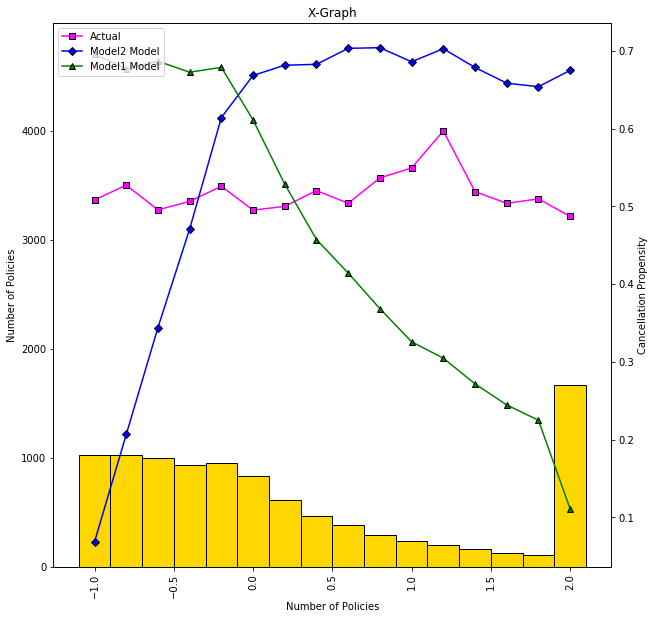

In [14]:
exposure=output_df['Count']
diff_band=output_df['Band']
obs=output_df['Observed Conversion']
prop=output_df['New Model']
curr=output_df['Current Model']

create_xgraph(exposure, prop, curr, obs, diff_band, model1_name, model2_name)

In [15]:
username = getpass.getuser()
f.write(f"Process ran by {username} is now complete.\n")
f.write(f"For any errors, bugs or future improvements, please contact Ben.\n")
f.close()